## Gradient Descent for tanh(m*x+c)

### when the model is y = tanh(m * x + c) and the true parameters are m = 1 and c = 2. And x belongs to (0, 2). Also, plot the ground truth function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
%matplotlib inline

In [7]:
#data points
N = 100
m = 1
c = 2
x = 2 * np.random.rand(N) # 100 uniformly distrributed values between 0 and 1 
thresh = 1e-10 #stopping criteria for optimization
y = np.tanh(m*x + c)
d = {}
for step_size in [0.1,0.2,0.3,0.4,0.5]:  #,0.01,0.001,0.0001,0.3
    
    m = 0.5 * np.random.rand(1)
    c = np.random.rand(1)
    


    def Cal_loss(y, x, m, c):
        data_loss=np.zeros(N)

        for i in range(N):

            data_loss[i] = (y[i] - (np.tanh(m*x[i] + c)**2))**2

        Loss = np.mean(data_loss)
        return Loss

    def Grad(y, x, m, c):
        dm = np.zeros(N)
        dc  = np.zeros(N)

        for i in range(N):
            dm[i] = -2 * x[i] * (y[i] - np.tanh(m*x[i] + c) ) * (1 - (np.tanh(m*x[i] + c)**2))
            dc[i] = -2 * (y[i] - np.tanh(m*x[i] + c) ) * (1 - (np.tanh(m*x[i] + c)**2))

        grad_m = np.mean(dm)
        grad_c  = np.mean(dc)


        return (grad_m, grad_c)

    def update(m_prev,c_prev, grad_m, grad_c, step_size):
        m = m_prev - step_size * grad_m
        c  = c_prev - step_size * grad_c

        return (m,c)

    def stop_criteria(y, x, m, c, m_prev,c_prev, thresh):
        Loss=Cal_loss(y, x, m, c)
        PrevLoss=Cal_loss(y, x, m_prev, c_prev)
        if np.abs(Loss-PrevLoss)<thresh:
            return "stop"
        else:
            return "continue"
        
    


    Loss_list = []

    while 1:
        grad_m, grad_c =  Grad(y, x, m, c)
        m_new, c_new = update(m, c, grad_m, grad_c, step_size)
        a = Cal_loss(y, x, m, c)
#         print a
        Loss_list.append(a)



        if stop_criteria(y,x,m_new,c_new,m,c,thresh)=="stop":

            break

        m = m_new
        c  = c_new

    d[step_size]  = Loss_list
    print "step size is {}".format(step_size)
    print "m is : {}".format(m)
    print "c is : {}".format(c)
    print "Loss is : {}".format(Loss_list[-1])
    
    def pred_y(x,m,c):
        y_est = np.tanh(m*x + c)
        return y_est

    y_hat = pred_y(x,m,c)
#     print "step size is {} and predicted value of y is {}".format(step_size,y_hat)
        


step size is 0.1
m is : [ 0.95335969]
c is : [ 2.01323569]
Loss is : 0.000123801037456
step size is 0.2
m is : [ 1.00407922]
c is : [ 1.99835396]
Loss is : 0.000124248363919
step size is 0.3
m is : [ 0.95950691]
c is : [ 2.01191169]
Loss is : 0.000123321318411
step size is 0.4
m is : [ 0.9623016]
c is : [ 2.01111415]
Loss is : 0.000123300528289
step size is 0.5
m is : [ 0.96637593]
c is : [ 2.00989347]
Loss is : 0.000123333538044


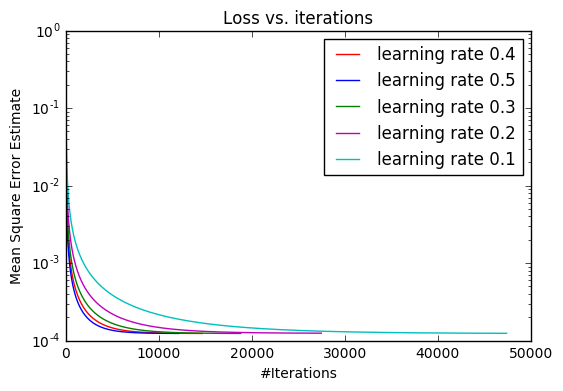

In [8]:
plt.figure()
color = ['r','b','g','m','c']
count = 0
for key,value in d.items():
    #used a log scale since a normal plot could not reflect such small loss values
    plt.semilogy(range(len(value)),value,color[count],label = "learning rate "+str(key))
    count += 1




plt.title("Loss vs. iterations")
plt.xlabel("#Iterations")
plt.ylabel("Mean Square Error Estimate")
plt.legend()
plt.show()


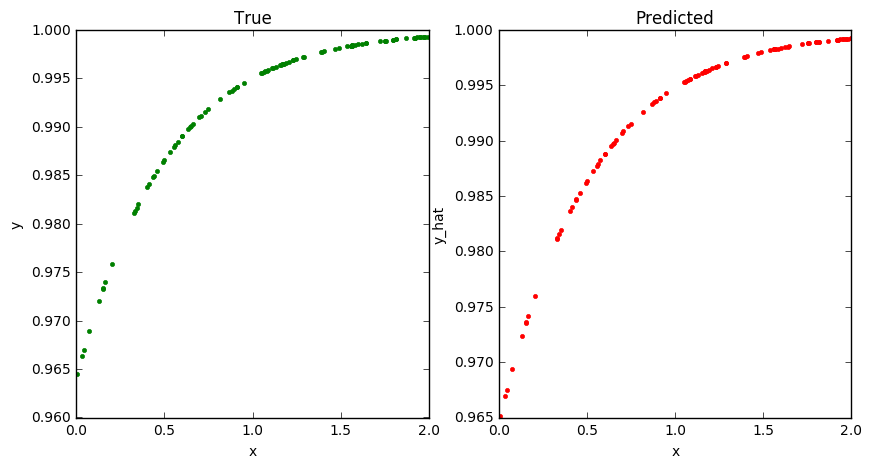

In [9]:
#ground truth plot
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].plot(x,y,'g.')
ax[1].plot(x,y_hat,'r.')

ax[0].set_title('True')
ax[1].set_title('Predicted')

ax[0].set_xlabel("x")
ax[1].set_xlabel("x")

ax[0].set_ylabel("y")
ax[1].set_ylabel("y_hat")